# The Chat Format

In this notebook, you will explore how you can utilize the chat format to have extended conversations with chatbots personalized or specialized for specific tasks or behaviors.

ChatGPT, the web interface, is a way for you 
to have a conversational interface, a conversation via a large language 
model. But one of the cool things is you can also use a 
large language model to build your custom chatbot 
to maybe play the role of an AI customer service agent or 
an AI order taker for a restaurant.

## Setup

In [ ]:
# set up the OpenAI Python package as usual

import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

So chat models like ChatGPT are actually trained 
to take a series of messages as input 
and return a model generated message as output. 
And so although the chat format is designed to make multi-turn 
conversations like this easy, we've kind of seen through the previous 
videos that it's also just as useful for single-turn tasks without any 
conversation.

## Define two helper functions

#### First function: get_completion 
(used in the other previous notebooks)

The ChatGPT model is a 
chat model which means it's trained to take 
a series of messages as input and then return a 
model generated message as output. So the user 
message is the input and then the 
assistant message is the output.

![OpenAI API call](OpenAI_API_call.png)

#### Second function: get_completion_from_messages

We're going to pass in a list of messages and these messages can be 
kind of from a variety of different roles.

So the system message helps to 
kind of set the behavior and persona of 
the assistant and it acts as kind of 
a high-level instruction for the conversation. So you can kind of think of 
it as whispering in the assistant's ear and kind of guiding its responses 
without the user being aware of the system 
message.

The benefit of the system message is that it provides you, the 
developer, with a way to kind of frame the conversation without 
making the request itself part of the conversation. So you can 
kind of guide the assistant and 
kind of whisper in its ear and guide its responses without 
making the user aware.

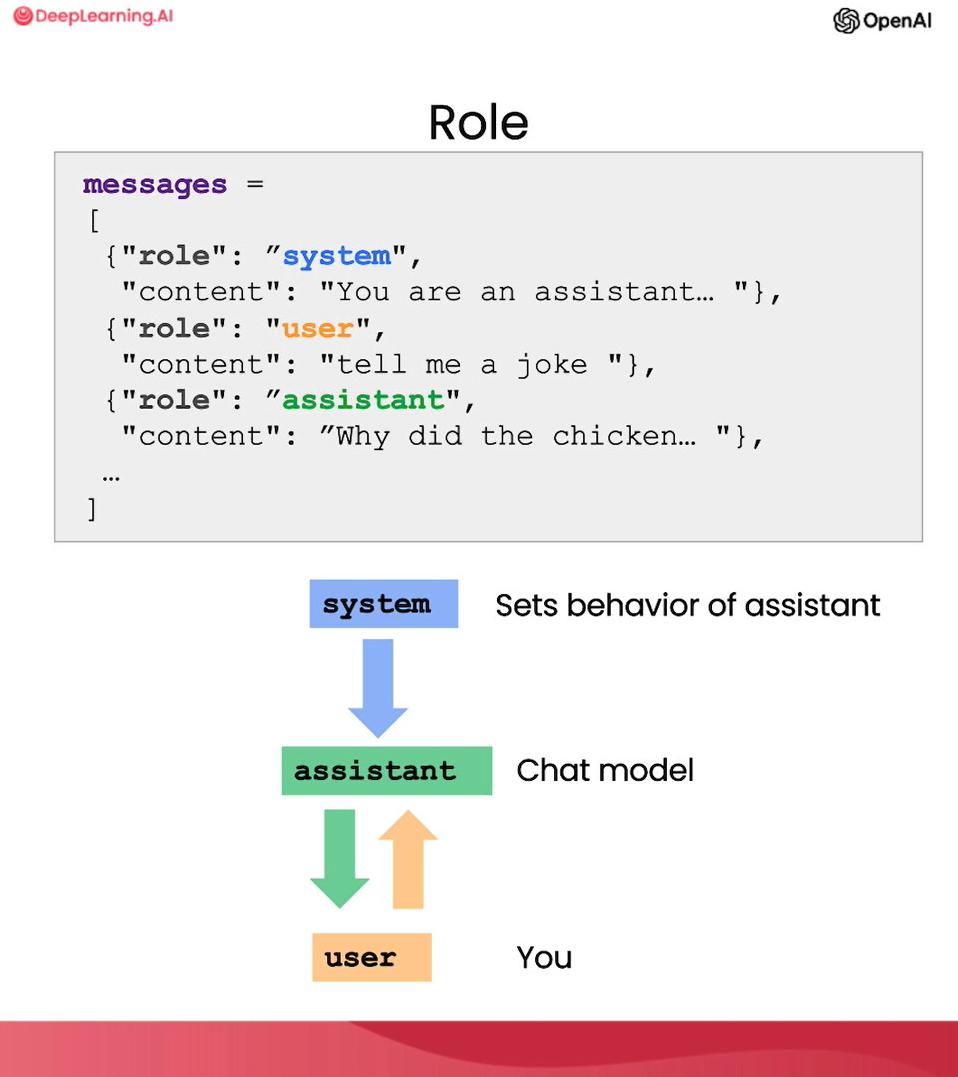

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [ ]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [ ]:
response = get_completion_from_messages(messages, temperature=1) # using a higher temperature
print(response)

*OUTPUT*

To reach the other side, fair sir! Methinks 'twas in search of adventure and greener pastures.

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

*OUTPUT*

Hello Isa! It's nice to meet you. How can I help you today?

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

*OUTPUT*

I'm sorry, but as a chatbot, I don't have access to personal information such as your name.

So each conversation with a language model is a 
standalone interaction, which means that you must provide 
all relevant messages for the model to draw from in the current 
conversation. 
If you want the model to draw from, or quote unquote remember 
earlier parts of a conversation, you must provide the 
earlier exchanges in the input to the model. And so we'll 
refer to this as context.

In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

*OUTPUT*

Your name is Isa!

# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

This chatbot is going to be called "OrderBot", and we're 
going to automate the collection of user prompts 
and assistant responses in order to build this "OrderBot". And 
it's going to take orders at a pizza restaurant, so first 
we're going to define this helper function, and what this 
is doing is it's going to kind of collect our user messages 
so we can avoid typing them in by hand in 
the same, in the way that we did above, and this is going 
to kind of collect prompts from a user interface that 
we'll build below, and then append it to 
a list called "context", and then it will call the model with that 
context every time. And the model response is 
then also added to the context, so the kind of model 
message is added to the context, the user message is added 
to the context, so on, so it just kind of 
grows longer and longer. 
This way the model has the information it needs to 
determine what to do next. And so now we'll 
set up and run this kind of UI to display the Autobot.

In [ ]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


![Context](context.png)

In [ ]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

![System Message](system_message.png)

![Chatbot](chatbot.png)

In [ ]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)

# we're using a lower temperature because for these kinds of tasks, we 
# want the output to be fairly predictable. For 
# a conversational agent, you might want to use 
# a higher temperature. However, in this case, I would maybe use a 
# lower temperature as well because for a customer's assistant 
# chatbot, you might want the output to be a bit more 
# predictable as well. 

print(response)

*OUTPUT*

Sure! Here's a JSON summary of your food order:
```json
{
  "pizza": {
    "size": "12.95",
    "toppings": ["extra cheese", "mushrooms"]
  },
  "drinks": [
    {
      "name": "coke",
      "size": "3.00"
    },
    {
      "name": "sprite",
      "size": "2.00"
    }
  ],
  "sides": [
    {
      "name": "fries",
      "size": "4.50"
    }
  ],
  "total_price": "25.45"
}
```
Please let me know if there's anything else you'd like to add to your order!